Ошибка загрузки изображения http://images.cocodataset.org/train2017/000000032201.jpg. Пробуем другое...
Ошибка загрузки изображения http://images.cocodataset.org/train2017/000000108760.jpg. Пробуем другое...
Ошибка загрузки изображения http://images.cocodataset.org/train2017/000000023962.jpg. Пробуем другое...
Ошибка загрузки изображения http://images.cocodataset.org/train2017/000000100060.jpg. Пробуем другое...


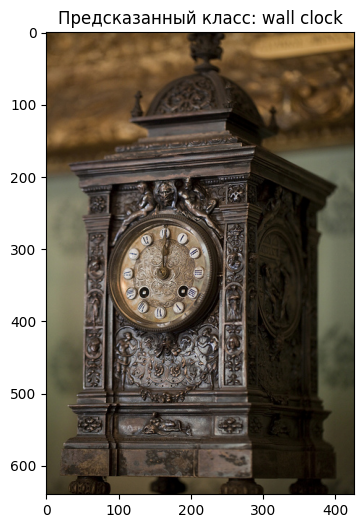

In [7]:
from transformers import AutoImageProcessor, MobileViTV2ForImageClassification
from PIL import Image
import requests
import matplotlib.pyplot as plt
import random

# Выбор изображения из COCO
def get_random_coco_image():
    random_image_id = random.randint(1, 120000)
    url = f"http://images.cocodataset.org/train2017/{random_image_id:012d}.jpg"

    # Избегание ошибки загрузки изображения
    try:
        response = requests.get(url, stream=True, timeout=5)
        response.raise_for_status()
        image = Image.open(response.raw)
        return image
    except Exception as e:
        print(f"Ошибка загрузки изображения {url}. Пробуем другое...")
        return get_random_coco_image()

# Загрузка изображения
image = get_random_coco_image()

# Загрузка модели
image_processor = AutoImageProcessor.from_pretrained("apple/mobilevitv2-1.0-imagenet1k-256")
model = MobileViTV2ForImageClassification.from_pretrained("apple/mobilevitv2-1.0-imagenet1k-256")

# классификацтя
inputs = image_processor(image, return_tensors="pt")
logits = model(**inputs).logits
predicted_label = logits.argmax(-1).item()
predicted_class = model.config.id2label[predicted_label]

# Результат
plt.figure(figsize=(8, 6))
plt.imshow(image)
plt.title(f"Предсказанный класс: {predicted_class}", fontsize=12)
plt.show()
